# Statistical and Machine Learning (01.113) - HW4 Question 3
By: Adam Ilyas 1002010

In this problem, we will perform principal component analysis (PCA) on sklearn’s diabetes dataset. Start by importing the required packages and load the dataset.

In [1]:
import numpy as np
from sklearn import decomposition, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
X = datasets.load_diabetes()

You can find out more on how to use sklearn’s PCA module from:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [3]:
feature_names = X["feature_names"]
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
df = pd.DataFrame(data=X["data"], columns=X["feature_names"])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Write code to print the matrix V that will be used to transform the dataset, and print all the singular values.

In [5]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X["data"])

Given a design matrix $X$, perform the following steps:

1. For each column of $X$, compute the mean and subtract it
from each entry in the column. At the same time, compute
the standard deviation and divide each entry in the column by
it (this ensures that each column is normalized to have mean
0 and standard deviation 1).
2. Do SVD on $X$ to yield $X = U\Sigma V^\intercal$ , then multiply $X$ by $V$ to get $XV = U\Sigma$
3. 

In [6]:
scaled_data = np.zeros(df.shape)

for col_index in range(10):
    current_column = df.values[:, col_index]
    col_mean = np.mean(current_column)
    col_std = np.std(current_column)
    scaled_data[:, col_index] = [(el - col_mean)/col_std for el in current_column]

In [7]:
u, s, vh = np.linalg.svd(scaled_data)
u.shape, s.shape, vh.shape
# s_full = np.zeros((442, 10),int)
# np.fill_diagonal(s_full, s, wrap=False)
# s_full

((442, 442), (10,), (10, 10))

In [8]:
print(vh.T)

[[-0.21643101  0.04437151  0.49466811 -0.4140095  -0.68686389  0.2258505
  -0.10953821  0.01493468 -0.00810057 -0.00326309]
 [-0.18696711 -0.38654811 -0.10685833 -0.67986052  0.37345612 -0.04173103
  -0.06760551  0.44293966  0.00210552 -0.00366069]
 [-0.3031625  -0.15628061  0.1675317   0.49982533  0.12935936  0.4031419
  -0.51985787  0.39294187 -0.04237751 -0.00824809]
 [-0.2717397  -0.13825564  0.51356804 -0.01966734  0.48689014  0.27276274
   0.32064908 -0.47736435 -0.0271941   0.00322111]
 [-0.34325493  0.57302669 -0.0685867  -0.06839533  0.12917415 -0.00540864
   0.07364908  0.12941351  0.04203984 -0.70977447]
 [-0.35186062  0.45593985 -0.26969438 -0.16777384  0.11673143  0.1332572
  -0.23054011 -0.19131121  0.35931549  0.56319605]
 [ 0.28243639  0.50624287  0.38602787 -0.07602005  0.24499115 -0.1063716
  -0.00753445  0.32463641 -0.48124771  0.31744413]
 [-0.42883325 -0.06818423 -0.38068121  0.0079212  -0.14364377  0.0339454
   0.07123619 -0.18058834 -0.77381656  0.09059464]
 [-0.

## Now perform PCA on the dataset and print out the 3 most important components for the first 10 data-points.

In [9]:
pca = decomposition.PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(x_pca.shape)
feature_vectors = pca.components_.T
print("Components: ")
print(feature_vectors)

(442, 3)
Components: 
[[ 0.21643101  0.04437151  0.49466811]
 [ 0.18696711 -0.38654811 -0.10685833]
 [ 0.3031625  -0.15628061  0.1675317 ]
 [ 0.2717397  -0.13825564  0.51356804]
 [ 0.34325493  0.57302669 -0.0685867 ]
 [ 0.35186062  0.45593985 -0.26969438]
 [-0.28243639  0.50624287  0.38602787]
 [ 0.42883325 -0.06818423 -0.38068121]
 [ 0.37861731 -0.0261893   0.0636315 ]
 [ 0.32218282 -0.0849466   0.27684271]]


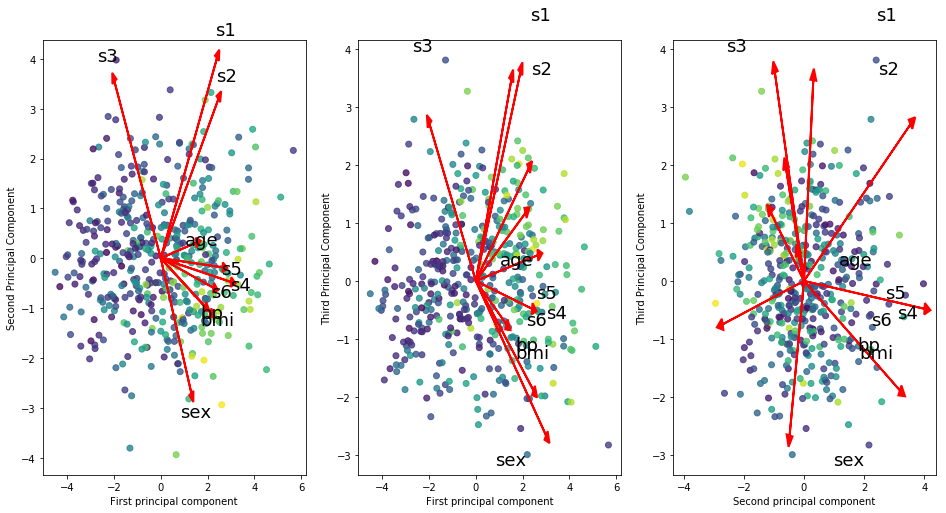

In [10]:
# using scaling factors to make the arrows
arrow_size, text_pos = 7.0, 8.0,

fig, axes = plt.subplots(ncols=3, figsize=(16,8))
axes[0].scatter(x_pca[:, 0], x_pca[:, 1], c=X["target"], alpha=0.8)
axes[0].set_xlabel('First principal component')
axes[0].set_ylabel('Second Principal Component')

# projections of the original features
for i, v in enumerate(feature_vectors):
    axes[0].arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    axes[0].text(v[0]*text_pos, v[1]*text_pos, feature_names[i] , color='black', ha='center', va='center', fontsize=18)

axes[1].scatter(x_pca[:, 0], x_pca[:, 2], c=X["target"], alpha=0.8)
axes[1].set_xlabel('First principal component')
axes[1].set_ylabel('Third Principal Component')
# projections of the original features
for i, v in enumerate(feature_vectors):
    axes[1].arrow(0, 0, arrow_size*v[0], arrow_size*v[2], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    axes[1].text(v[0]*text_pos, v[1]*text_pos, feature_names[i] , color='black', ha='center', va='center', fontsize=18)

axes[2].scatter(x_pca[:, 1], x_pca[:, 2], c=X["target"], alpha=0.8)
axes[2].set_xlabel('Second principal component')
axes[2].set_ylabel('Third Principal Component')
# projections of the original features
for i, v in enumerate(feature_vectors):
    axes[2].arrow(0, 0, arrow_size*v[1], arrow_size*v[2], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    axes[2].text(v[0]*text_pos, v[1]*text_pos, feature_names[i] , color='black', ha='center', va='center', fontsize=18)

In [11]:
pca = decomposition.PCA(n_components=3)
pca.fit(scaled_data[:10, :])
x_pca = pca.transform(scaled_data[:10, :])
components = pca.components_
print(x_pca.shape)
feature_vectors = pca.components_.T
print("Components: ")
print(feature_vectors)

(10, 3)
Components: 
[[-0.56199682  0.13351754 -0.4882186 ]
 [-0.39349162 -0.0644871  -0.39427866]
 [-0.31665733 -0.45014527 -0.02361069]
 [-0.19727171  0.24364832 -0.03987135]
 [-0.24739452  0.37322118  0.40515611]
 [-0.34880761  0.41113195  0.38116742]
 [ 0.19972426  0.41511539 -0.13740601]
 [-0.23951731 -0.04933194  0.31465208]
 [-0.10031679 -0.45542528  0.34960031]
 [-0.31613817 -0.15977816  0.23343725]]


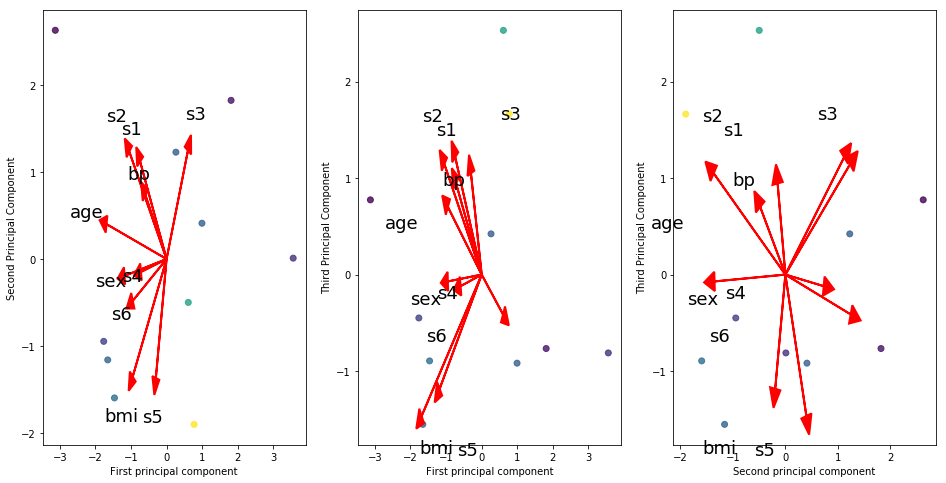

In [12]:
# using scaling factors to make the arrows
arrow_size, text_pos = 3.0, 4.0,

fig, axes = plt.subplots(ncols=3, figsize=(16,8))
axes[0].scatter(x_pca[:, 0], x_pca[:, 1], c=X["target"][:10], alpha=0.8)
axes[0].set_xlabel('First principal component')
axes[0].set_ylabel('Second Principal Component')

# projections of the original features
for i, v in enumerate(feature_vectors):
    axes[0].arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    axes[0].text(v[0]*text_pos, v[1]*text_pos, feature_names[i] , color='black', ha='center', va='center', fontsize=18)

axes[1].scatter(x_pca[:, 0], x_pca[:, 2], c=X["target"][:10], alpha=0.8)
axes[1].set_xlabel('First principal component')
axes[1].set_ylabel('Third Principal Component')
# projections of the original features
for i, v in enumerate(feature_vectors):
    axes[1].arrow(0, 0, arrow_size*v[0], arrow_size*v[2], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    axes[1].text(v[0]*text_pos, v[1]*text_pos, feature_names[i] , color='black', ha='center', va='center', fontsize=18)

axes[2].scatter(x_pca[:, 1], x_pca[:, 2], c=X["target"][:10], alpha=0.8)
axes[2].set_xlabel('Second principal component')
axes[2].set_ylabel('Third Principal Component')
# projections of the original features
for i, v in enumerate(feature_vectors):
    axes[2].arrow(0, 0, arrow_size*v[1], arrow_size*v[2], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    axes[2].text(v[0]*text_pos, v[1]*text_pos, feature_names[i] , color='black', ha='center', va='center', fontsize=18)

In [13]:
print(components.T)

[[-0.56199682  0.13351754 -0.4882186 ]
 [-0.39349162 -0.0644871  -0.39427866]
 [-0.31665733 -0.45014527 -0.02361069]
 [-0.19727171  0.24364832 -0.03987135]
 [-0.24739452  0.37322118  0.40515611]
 [-0.34880761  0.41113195  0.38116742]
 [ 0.19972426  0.41511539 -0.13740601]
 [-0.23951731 -0.04933194  0.31465208]
 [-0.10031679 -0.45542528  0.34960031]
 [-0.31613817 -0.15977816  0.23343725]]
